In [92]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
import herschelhelp.cutouts_server as ctts

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting
import pyvo as vo
import glob

from astropy.io import registry
from astropy.table.info import serialize_method_as

import copy

In [2]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [3]:
def find_posteror_source(source_num,source_id):
    #finds the pkl file corresponding to the source you give.
    # Source_num: the row number of the source you want the pkl file for
    # Source_id: the sources id
    
    if type(source_num)==int:
        source_num = [source_num]
        source_id = [source_id]
    

    source_list = []
    for n,num in enumerate(source_num):
        file_num = int(num/10)
        #print(file_num)
        #print('data/fir_v2/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num))
        name = file_list[file_num].replace('fits','pkl.pkl')
        #print(name)
        priors,posterior = xidplus.load(name)
        #print(source_id[n])
        if source_id[n] not in priors[0].ID:
            print('source number :{}: not in opened file. Something is wrong'.format(num))
        source_list.append([priors,posterior])
        
    return(source_list)

In [5]:
lofar_orig = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mips_prior = Table.read('data/data_release/xidplus_prior_cat_MIPS_rerun.fits')
pacs_prior = Table.read('data/data_release/xidplus_prior_cat_rerun_mips.fits')

In [6]:
lofar_orig[0]

<Row index=0 masked=True>
     Source_Name               RA                DEC                 E_RA                 E_DEC                Total_flux            E_Total_flux            Peak_flux           E_Peak_flux      S_Code         Maj                   Min                  PA                E_Maj                 E_Min                E_PA                DC_Maj                DC_Min              DC_PA               Isl_rms         FLAG_WORKFLOW Prefilter  NoID  lr_fin   optRA      optDec  LGZ_Size LGZ_Width  LGZ_PA Assoc Assoc_Qual Art_prob Blend_prob Hostbroken_prob Imagemissing_prob Zoom_prob        Created           Position_from   Renamed_from FLAG_OVERLAP_RADIO flag_clean_radio    ID   X_IMAGE Y_IMAGE ALPHA_J2000 DELTA_J2000 flag_clean ID_OPTICAL ID_SPITZER FLAG_OVERLAP     EBV        u_flux_corr        u_fluxerr_corr       u_mag_corr     u_magerr_corr    g_flux_corr       g_fluxerr_corr       g_mag_corr    g_magerr_corr      r_flux_corr          r_fluxerr_corr       r_mag_corr    r_magerr_corr z_flux_corr z_fluxerr_corr z_mag_corr z_magerr_corr  g_rcs_flux_corr   g_rcs_fluxerr_corr   g_rcs_mag_corr   g_rcs_magerr_corr  r_rcs_flux_corr   r_rcs_fluxerr_corr   r_rcs_mag_corr   r_rcs_magerr_corr i_rcs_flux_corr  i_rcs_fluxerr_corr   i_rcs_mag_corr  i_rcs_magerr_corr  z_rcs_flux_corr  z_rcs_fluxerr_corr   z_rcs_mag_corr  z_rcs_magerr_corr J_flux_corr J_fluxerr_corr J_mag_corr J_magerr_corr K_flux_corr K_fluxerr_corr K_mag_corr K_magerr_corr ch1_swire_flux_corr ch1_swire_fluxerr_corr ch1_swire_mag_corr ch1_swire_magerr_corr ch2_swire_flux_corr ch2_swire_fluxerr_corr ch2_swire_mag_corr ch2_swire_magerr_corr ch3_swire_flux_corr ch3_swire_fluxerr_corr ch3_swire_mag_corr ch3_swire_magerr_corr ch4_swire_flux_corr ch4_swire_fluxerr_corr ch4_swire_mag_corr ch4_swire_magerr_corr ch1_servs_flux_corr ch1_servs_fluxerr_corr ch1_servs_mag_corr ch1_servs_magerr_corr ch2_servs_flux_corr ch2_servs_fluxerr_corr ch2_servs_mag_corr ch2_servs_magerr_corr Separation help_id RA_HELP DEC_HELP CLASS_STAR F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l Bkg_MIPS_24 Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna chi_r_best chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN hp_idx_11 hp_depth_cluster tot_corr_g tot_corr_err_g tot_corr_r tot_corr_err_r tot_corr_z tot_corr_err_z  zmodel chi_best Mass_median Mass_l68 Mass_u68 SFR_median SFR_l68 SFR_u68 Nfilts  u_rest  g_rest  r_rest  z_rest g_rcs_rest r_rcs_rest i_rcs_rest z_rcs_rest  J_rest  K_rest ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [4]:
masterlist = Table.read('../../../../../HELP/dmu_products/dmu32/dmu32_Lockman-SWIRE/data/Lockman-SWIRE_20180219.fits')

In [110]:
np.sum(masterlist['flag_pacs_green'])

211352

In [112]:
np.sum(~np.isnan(masterlist['f_pacs_green']))

242521

In [7]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

## Create MIPS lofar catalogues

In [117]:
lofar = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mask = (~np.isnan(lofar['F_MIPS_24'])) 
lofar_mips = lofar[~mask]

In [122]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.pkl')

name = file_list[0]
taskid = int(name.split('/')[3][12:])
batch_size = 20

ind_low = taskid*batch_size
if taskid*batch_size+batch_size>len(lofar):
    ind_up = len(lofar)
else:
    ind_up = taskid*batch_size+batch_size

ids = lofar_mips['Source_Name'][ind_low:ind_up]

name = file_list[0]
taskid = name.split('/')[3][12:]

priors,posterior = xidplus.load(file_list[0])
MIPS_cat = cat.create_MIPS_cat(posterior,priors[0],0)
MIPS_cat = Table.read(MIPS_cat)
mask = [MIPS_cat['help_id'][i] in ids for i in range(len(MIPS_cat))]
lofar_mips_table = MIPS_cat[mask]

from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(MIPS_cat[mask], None):
    registry.write(MIPS_cat[mask], file_list[0].replace('.pkl','_radio.fits'),format='fits',overwrite=True)

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print (filename,filename.split('/')[3][12:])
    taskid = int(filename.split('/')[3][12:])
    batch_size = 20

    ind_low = taskid*batch_size
    if taskid*batch_size+batch_size>len(lofar):
        ind_up = len(lofar)
    else:
        ind_up = taskid*batch_size+batch_size

    ids = lofar_mips['Source_Name'][ind_low:ind_up]
    
    priors,posterior = xidplus.load(filename)
    MIPS_cat = cat.create_MIPS_cat(posterior,priors[0],0)
    MIPS_cat = Table.read(MIPS_cat,memmap=False)
    mask = [MIPS_cat['help_id'][i] in ids for i in range(len(MIPS_cat))]
    
    with serialize_method_as(MIPS_cat[mask], None):
        registry.write(MIPS_cat[mask], filename.replace('.pkl','_radio.fits'),format='fits',overwrite=True)
    
    lofar_mips_table = vstack([lofar_mips_table,MIPS_cat[mask]])
    

data_rerun_table = lofar_mips_table

<class 'astropy.table.table.Table'>
fits
0


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
50


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
100


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
150


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
200


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
250


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
300


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
350


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
400


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
450


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
500


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


## Comparing MIPS sources with HELP

In [124]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
lofar_mips_table_all = Table.read(MIPS_cat,memmap=False)

for i,filename in enumerate(file_list[1:10]):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
    MIPS_cat = Table.read(MIPS_cat,memmap=False)
    lofar_mips_table_all = vstack([lofar_mips_table_all,MIPS_cat])

0


In [125]:
print(len(lofar_mips_table_all))
lofar_mips_table_all[0]

1319


<Row index=0>
          help_id                   RA               Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24
                                 degrees           degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                           
           str27                 float64           float64       float32     float32        float32        float32        float32        float32       float32      float32  
--------------------------- ----------------- ----------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- -----------
HELP_J110123.462+573429.046 165.3477562837025 57.57473500485325 238.09023      262.09393      214.98935 -0.0055315113     4.906216e-06    0.9996117        2000.0         0.0

In [126]:
joined_mips = join(lofar_mips_table_all,masterlist,join_type='inner',keys='help_id')

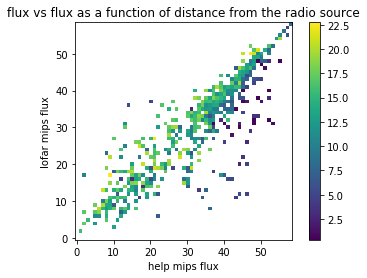

In [127]:
ra1 = lofar_mips_table['RA'].data
dec1 = lofar_mips_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_mips['ra'].data
dec1 = joined_mips['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

x = np.log10(joined_mips['f_mips_24'])
y = np.log10(joined_mips['F_MIPS_24'])
col = d2d.value*3600

bins = np.linspace(0,3,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('help mips flux')
plt.ylabel('lofar mips flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

## Processing MIPS output

In [128]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus_*_radio.fits')


lofar_mips_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_mips_table = vstack([lofar_mips_table,new_table])
data_rerun_table = lofar_mips_table

0
50
100
150
200
250
300
350
400
data/fir/MIPS/xidplus_run_545/lofar_xidplus_fir_545_radio.fits
length of table is: 9
450
500


In [129]:
lofar_mips_table[0]

<Row index=0>
       help_id                RA               Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24
                           degrees           degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                           
       bytes27             float64           float64       float32     float32        float32        float32        float32        float32       float32      float32  
---------------------- ---------------- ----------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- -----------
ILTJ110124.81+575525.0 165.353780313947 57.92352269589598 230.83282       343.8033       90.52865 -0.0055315113     4.906216e-06    1.0001004        2000.0         0.0

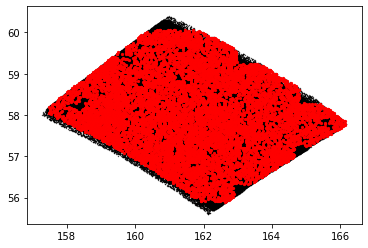

In [130]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

x = mips_prior['ra']
y = mips_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_mips_table['RA']#[~ind_SERVS_160]
decs = lofar_mips_table['Dec']#[~ind_SERVS_160]
plt.scatter(ras,decs,c='red',s=5)


plt.show()

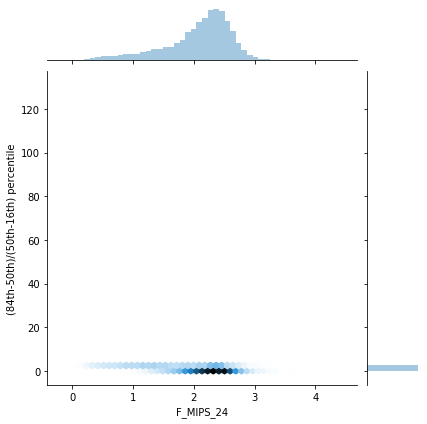

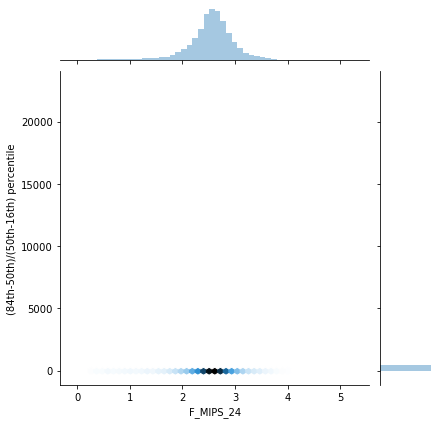

In [131]:
skew=(lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_mips_table['F_MIPS_24']),y=skew, kind='hex')

skew=(lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_MIPS_24']),y=skew, kind='hex')

In [132]:
lofar_mips_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_mips_24'))



In [133]:
ind_SERVS_250=(lofar_mips_table['Pval_res_24']>0.5) | (lofar_mips_table['F_MIPS_24'] <20)
print(ind_SERVS_250.sum(),len(lofar_mips_table))

lofar_mips_table['flag_mips_24'][ind_SERVS_250]=True

1821 10909


In [134]:
rerun_col = Column(np.ones(len(lofar_mips_table)),name='XID+_rerun_mips',dtype='bool')
lofar_mips_table.add_column(rerun_col)

In [135]:
lofar_mips_table[0]

<Row index=0>
       help_id                RA               Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 XID+_rerun_mips
                           degrees           degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                                                        
       bytes27             float64           float64       float32     float32        float32        float32        float32        float32       float32      float32       bool           bool     
---------------------- ---------------- ----------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- ----------- ------------ ---------------
ILTJ110124.81+575525.0 165.353780313947 57.92352269589598 230.83282       343.8033       90.52865 -0.0055315113     4.906216e-06    1.0001004        2000.0         0.0        False            True

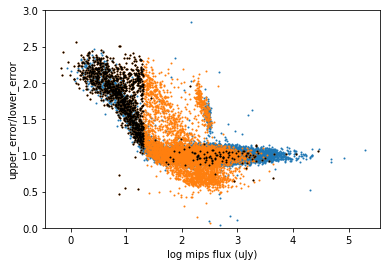

In [136]:
x = np.log10(lofar_orig['F_MIPS_24'])
y = (lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_mips_table['F_MIPS_24'])
y = (lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log mips flux (uJy)')
plt.ylabel('upper_error/lower_error')
plt.ylim(0,3)
plt.show()

### Plot mips sources

In [50]:
#read in mips image and create wcs
imfolder='../../../../../HELP/dmu_products/dmu17/dmu17_HELP_Legacy_maps/Lockman-SWIRE/data/'

pswfits=imfolder+'wp4_lockman-swire_mips24_map_v1.0.fits.gz'#SPIRE 250 map

MIPS_Map = fits.open(pswfits)

#-----250-------------
hdulist = fits.open(pswfits)
im24phdu=hdulist[0].header
im24hdu=hdulist[1].header

im24=hdulist[1].data*1.0E3 #convert to mJy
nim24=hdulist[2].data*1.0E3 #convert to mJy
w_24 = wcs.WCS(hdulist[1].header)
hdulist.close()

In [51]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

In [52]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

contours are at [-7.83554691e-05 -1.15391003e-05  5.52772684e-05  1.22093637e-04
  1.88910006e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources


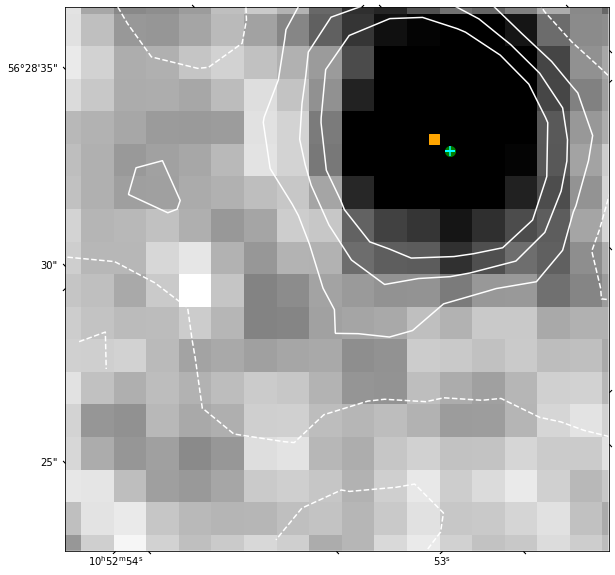

In [54]:
mask = lofar_mips_table['F_MIPS_24']>10**2.5
ra = lofar_mips_table['RA'][mask][3]
dec = lofar_mips_table['Dec'][mask][3]


image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig],w_24,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Create the PACS lofar catalogues

In [94]:
lofar = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mask = (~np.isnan(lofar['F_SPIRE_250'])) | (~np.isnan(lofar['F_SPIRE_350'])) | (~np.isnan(lofar['F_SPIRE_500']))
lofar_pacs = lofar[~mask]

In [99]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus*.pkl')

name = file_list[0]
taskid = int(name.split('/')[3][12:])
batch_size = 20

ind_low = taskid*batch_size
if taskid*batch_size+batch_size>len(lofar):
    ind_up = len(lofar)
else:
    ind_up = taskid*batch_size+batch_size

ids = lofar_pacs['Source_Name'][ind_low:ind_up]

name = file_list[0]
taskid = name.split('/')[3][12:]

priors,posterior = xidplus.load(file_list[0])
PACS_cat = cat.create_PACS_cat(posterior,priors[0],priors[1])
PACS_cat = Table.read(PACS_cat)
mask = [PACS_cat['help_id'][i] in ids for i in range(len(PACS_cat))]
lofar_PACS_table = PACS_cat[mask]

from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(PACS_cat[mask], None):
    registry.write(PACS_cat[mask], file_list[0].replace('.pkl','_radio.fits'),format='fits',overwrite=True)

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(len(lofar_PACS_table))
        print(i)
    
    #print (filename,filename.split('/')[3][12:])
    taskid = int(filename.split('/')[3][12:])
    batch_size = 20

    ind_low = taskid*batch_size
    if taskid*batch_size+batch_size>len(lofar):
        ind_up = len(lofar)
    else:
        ind_up = taskid*batch_size+batch_size

    ids = lofar_pacs['Source_Name'][ind_low:ind_up]
    
    priors,posterior = xidplus.load(filename)
    PACS_cat = cat.create_PACS_cat(posterior,priors[0],priors[1])
    PACS_cat = Table.read(PACS_cat,memmap=False)
    mask = [PACS_cat['help_id'][i] in ids for i in range(len(PACS_cat))]
    
    with serialize_method_as(PACS_cat[mask], None):
        registry.write(PACS_cat[mask], filename.replace('.pkl','_radio.fits'),format='fits',overwrite=True)
    
    lofar_PACS_table = vstack([lofar_PACS_table,PACS_cat[mask]])
    

data_rerun_table = lofar_PACS_table

<class 'astropy.table.table.Table'>
fits
20
0


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
1017
50


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
2017
100


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
3017
150


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
4017
200


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
5017
250


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
6017
300


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
7017
350


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
8017
400


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
9017
450


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
10017
500


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
11017
550


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


## Check PACS results against HELP results

In [113]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
lofar_pacs_table_all = Table.read(PACS_cat,memmap=False)

for i,filename in enumerate(file_list[1:20]):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
    PACS_cat = Table.read(PACS_cat,memmap=False)
    
    lofar_pacs_table_all = vstack([lofar_pacs_table_all,PACS_cat])   

0


In [114]:
joined_pacs = join(lofar_pacs_table_all,masterlist,join_type='inner',keys='help_id')

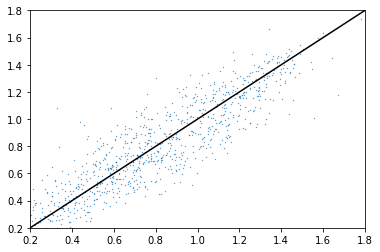

In [115]:
x = np.log10(joined_pacs['f_pacs_green'])-3
xerr = np.log10(joined_pacs['ferr_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])
yerr_u = np.log10(joined_pacs['FErr_PACS_100_u'])
yerr_l = np.log10(joined_pacs['FErr_PACS_100_l'])

#plt.errorbar(x,y,xerr=xerr,yerr=[yerr_u,yerr_l])
plt.scatter(x,y,s=0.1)
plt.plot([0,2],[0,2],c='black')
plt.xlim(0.2,1.8)
plt.ylim(0.2,1.8)
plt.show()

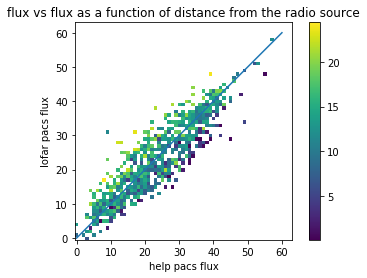

In [116]:
ra1 = lofar_pacs_table['RA'].data
dec1 = lofar_pacs_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_pacs['ra'].data
dec1 = joined_pacs['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

col = d2d.value*3600

x = np.log10(joined_pacs['f_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])

bins = np.linspace(0,2,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.plot([0,60],[0,60])
plt.colorbar()
plt.xlabel('help pacs flux')
plt.ylabel('lofar pacs flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [ ]:
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(lofar_pacs_table, None):
            registry.write(lofar_pacs_table, 'data/fir/PACS/all_sources.fits',format='fits')

## Processing PACS output

In [101]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus_fir*_radio.fits')
#num_not = np.arange(428,860,1)

lofar_pacs_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_pacs_table = vstack([lofar_pacs_table,new_table])
data_rerun_table = lofar_pacs_table

0
data/fir/PACS/xidplus_run_587/lofar_xidplus_fir_587_radio.fits
length of table is: 17
50
100
150
200
250
300
350
400
450
500
550


In [102]:
lofar_pacs_table[0]

<Row index=0>
       help_id             RA        Dec    F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160
                        degrees    degrees     mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam     mJy/Beam        mJy/Beam          mJy/Beam                                                                                        
       bytes27          float64    float64   float32       float32         float32      float32       float32         float32       float32      float32         float32           float32         float32       float32       float32        float32       float32      float32   
---------------------- ---------- --------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------ ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------
ILTJ105704.26+582422.3 164.267551 58.406129  3.3419878       7.4362955      0.88577753  5.4692783       12.018589       1.3765917     5.839395     2.193922          7.373546          3.198948     1.0010939     1.0005685         2000.0         2000.0        0.997        0.296

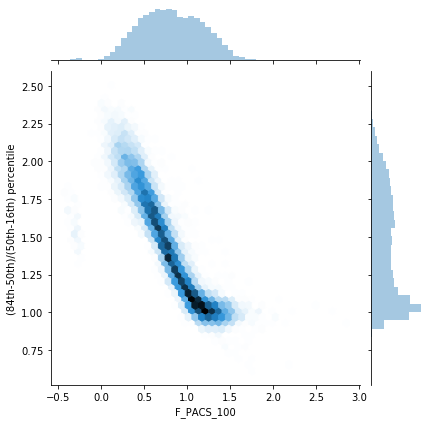

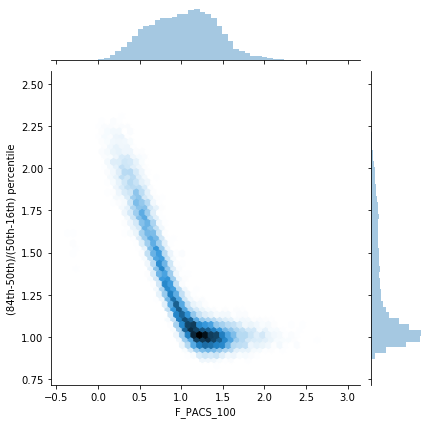

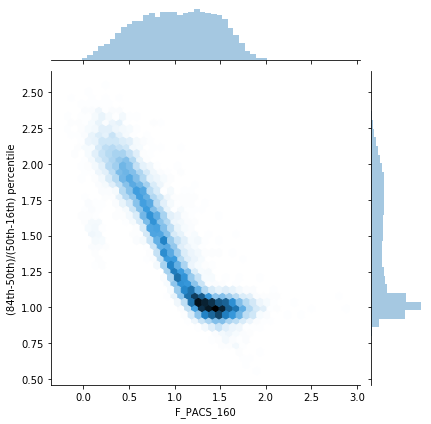

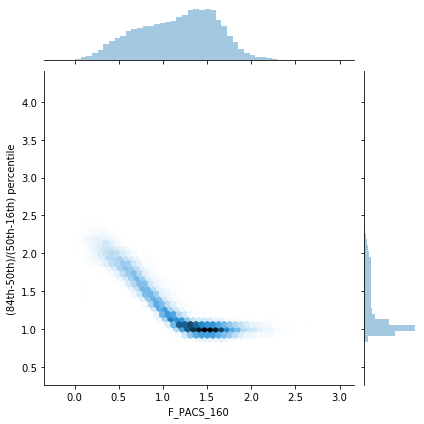

In [103]:
skew=(lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_160']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_160']),y=skew, kind='hex')

In [104]:
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_100'))
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_160'))

In [105]:
ind_SERVS_100=(lofar_pacs_table['Pval_res_100']>0.5) | (lofar_pacs_table['F_PACS_100'] < 12.5)
ind_SERVS_160=(lofar_pacs_table['Pval_res_160']>0.5) | (lofar_pacs_table['F_PACS_160'] < 17.5)
print(ind_SERVS_100.sum(),ind_SERVS_160.sum(),len(lofar_pacs_table))

lofar_pacs_table['flag_pacs_100'][ind_SERVS_100]=True
lofar_pacs_table['flag_pacs_160'][ind_SERVS_160]=True

11756 8564 11757


In [106]:
rerun_col = Column(np.ones(len(lofar_pacs_table)),name='XID+_rerun_pacs',dtype='bool')
lofar_pacs_table.add_column(rerun_col)

In [107]:
lofar_pacs_table[0]

<Row index=0>
       help_id             RA        Dec    F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_pacs_100 flag_pacs_160 XID+_rerun_pacs
                        degrees    degrees     mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam     mJy/Beam        mJy/Beam          mJy/Beam                                                                                                                                    
       bytes27          float64    float64   float32       float32         float32      float32       float32         float32       float32      float32         float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool     
---------------------- ---------- --------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------ ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- ---------------
ILTJ105704.26+582422.3 164.267551 58.406129  3.3419878       7.4362955      0.88577753  5.4692783       12.018589       1.3765917     5.839395     2.193922          7.373546          3.198948     1.0010939     1.0005685         2000.0         2000.0        0.997        0.296          True          True            True

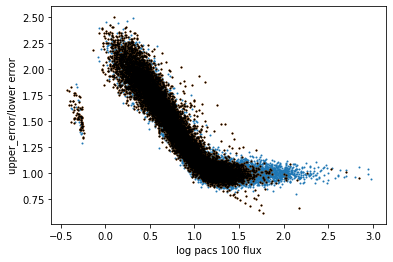

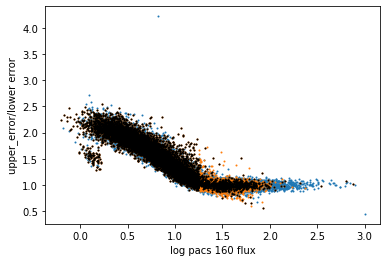

In [108]:
x = np.log10(lofar_orig['F_PACS_100'])
y = (lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_100'])
y = (lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_100],y[ind_SERVS_100],s=1,c='black')
plt.xlabel('log pacs 100 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_PACS_160'])
y = (lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_160'])
y = (lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_160],y[ind_SERVS_160],s=1,c='black')
plt.xlabel('log pacs 160 flux')
plt.ylabel('upper_error/lower error')
plt.show()

In [138]:
imfolder='../../../../../HELP/dmu_products/dmu18/dmu18_HELP-PACS-maps/data/'

im100fits=imfolder + 'Lockman-SWIRE_PACS100_v0.9.fits'#PACS 100 map
im160fits=imfolder + 'Lockman-SWIRE_PACS160_v0.9.fits'#PACS 160 map

#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist[0].header
im100hdu=hdulist[1].header
im100=hdulist[1].data
w_100 = wcs.WCS(hdulist[1].header)
pixsize100=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim100=hdulist[2].data
hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist[0].header
im160hdu=hdulist[1].header

im160=hdulist[1].data #convert to mJy
w_160 = wcs.WCS(hdulist[1].header)
pixsize160=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim160=hdulist[2].data
hdulist.close()

In [139]:
plot_params = {'marker':['o','+','+','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

contours are at [-7.29117664e-05 -2.80221563e-05  1.68674537e-05  6.17570638e-05
  1.06646674e-04  1.51536284e-04  1.96425894e-04]
plotting 13 sources
plotting 3 sources
plotting 3 sources


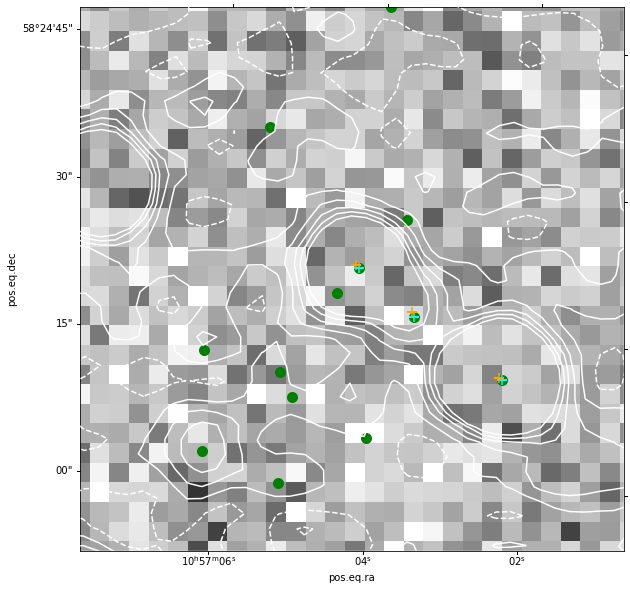

contours are at [-6.67420884e-05 -2.56890266e-05  1.53640351e-05  5.64170968e-05
  9.74701586e-05  1.38523220e-04  1.79576282e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources


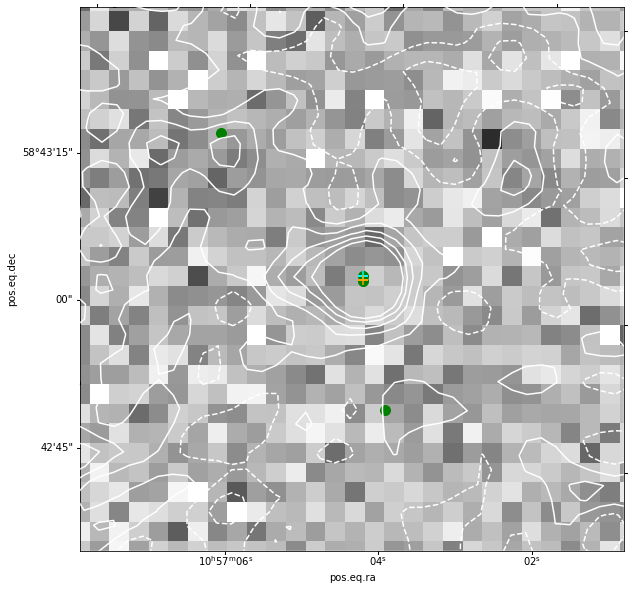

contours are at [-7.37637401e-05 -2.40687949e-05  2.56261502e-05  7.53210954e-05
  1.25016041e-04  1.74710986e-04  2.24405931e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources


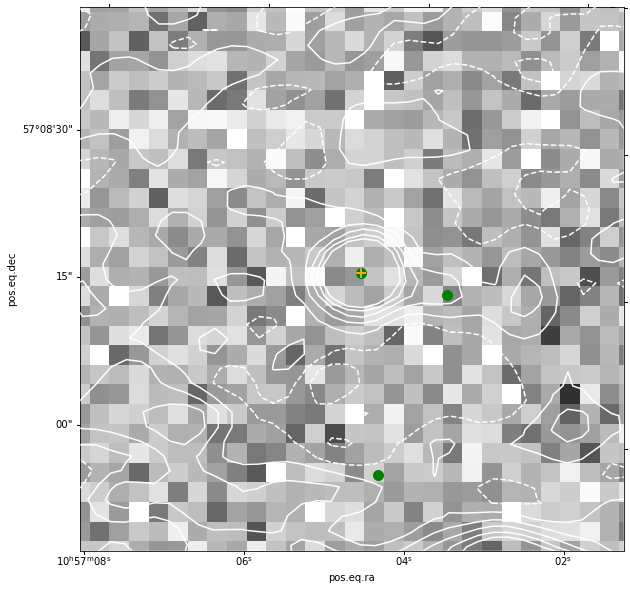

contours are at [-7.40755129e-05 -1.96820561e-05  3.47114006e-05  8.91048574e-05
  1.43498314e-04  1.97891771e-04  2.52285228e-04]
plotting 6 sources
plotting 2 sources
plotting 2 sources


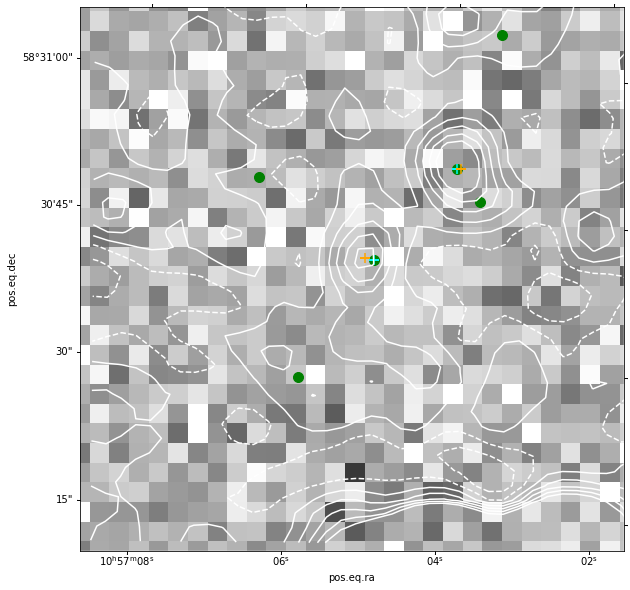

contours are at [-8.25608738e-05 -3.31498674e-05  1.62611390e-05  6.56721453e-05
  1.15083152e-04  1.64494158e-04  2.13905164e-04]
plotting 5 sources
plotting 1 sources
plotting 2 sources


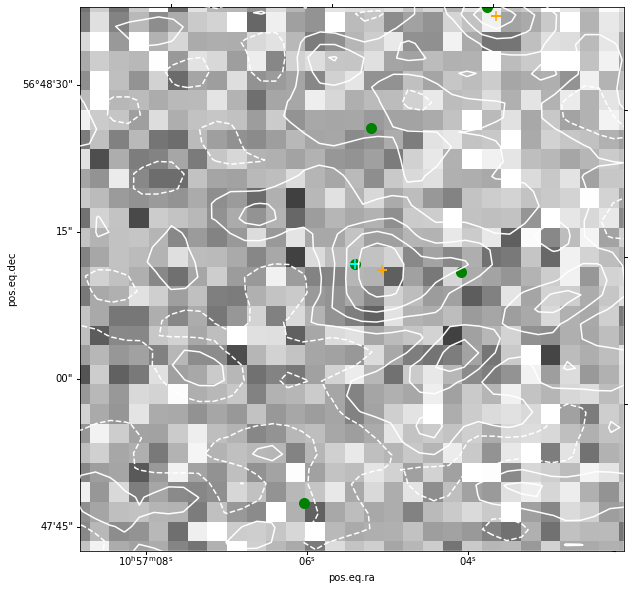

contours are at [-6.01762835e-05 -2.42372791e-05  1.17017252e-05  4.76407295e-05
  8.35797338e-05  1.19518738e-04  1.55457742e-04]
plotting 6 sources
plotting 1 sources
plotting 1 sources


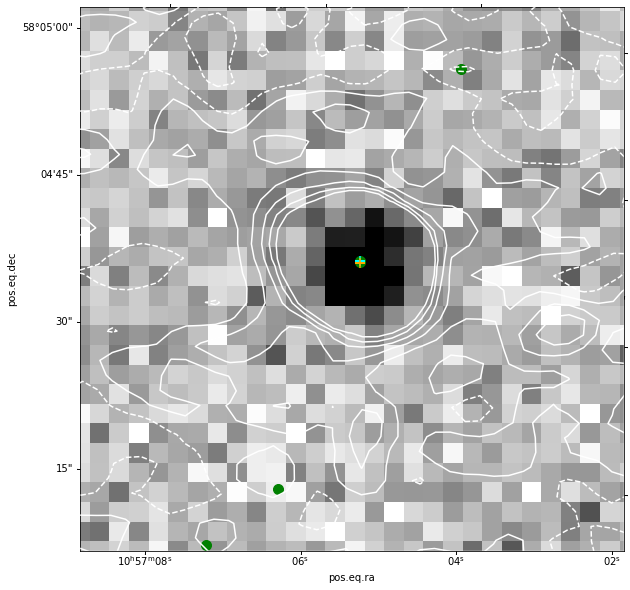

contours are at [-7.63298643e-05 -2.63765503e-05  2.35767636e-05  7.35300775e-05
  1.23483391e-04  1.73436705e-04  2.23390019e-04]
plotting 9 sources
plotting 1 sources
plotting 1 sources


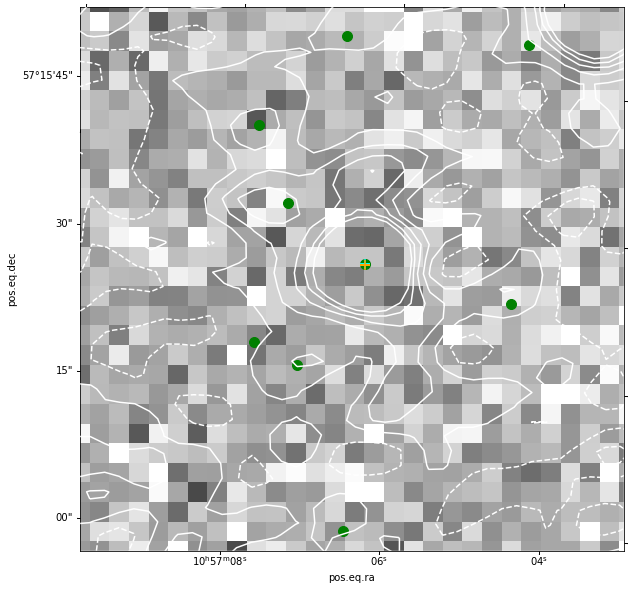

contours are at [-7.07209302e-05 -3.66690831e-05 -2.61723591e-06  3.14346113e-05
  6.54864584e-05  9.95383056e-05  1.33590153e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources


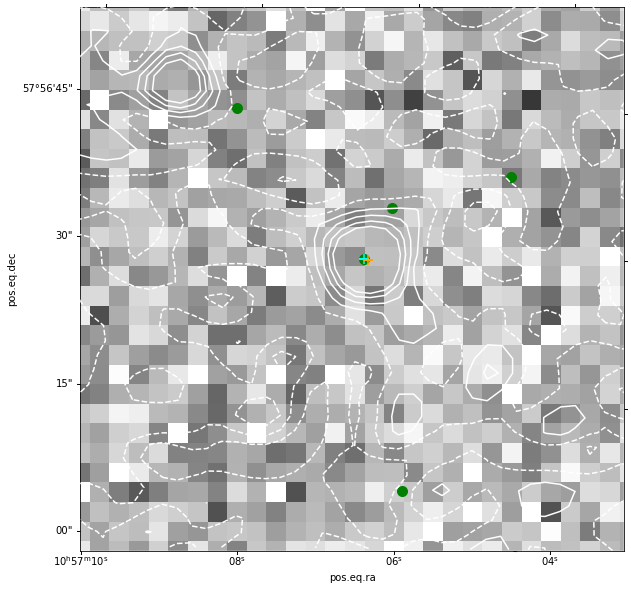

contours are at [-7.31325862e-05 -2.79908749e-05  1.71508365e-05  6.22925478e-05
  1.07434259e-04  1.52575971e-04  1.97717682e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


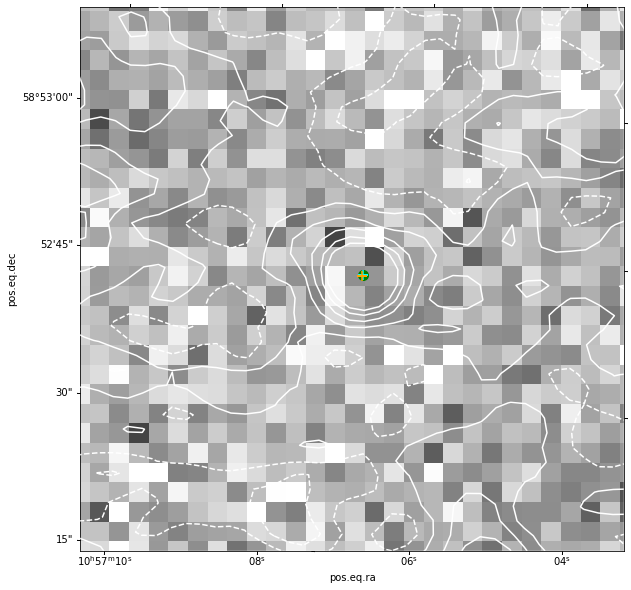

contours are at [-6.80571169e-05 -2.25274686e-05  2.30021797e-05  6.85318280e-05
  1.14061476e-04  1.59591125e-04  2.05120773e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources


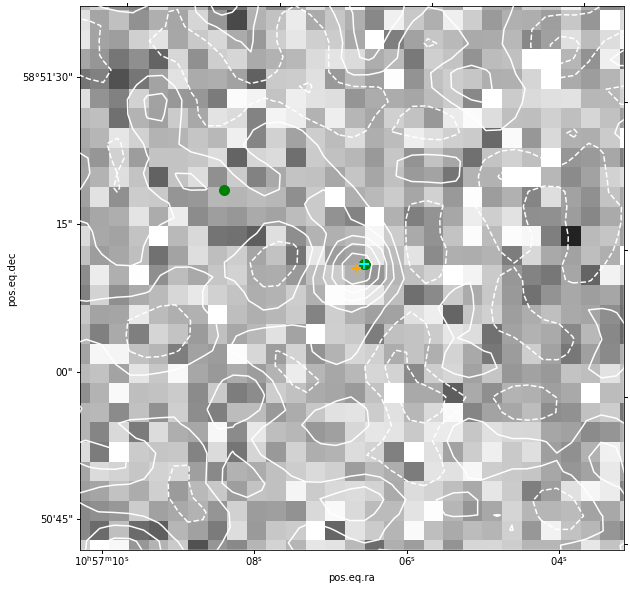

contours are at [-7.83068275e-05 -3.10422154e-05  1.62223967e-05  6.34870088e-05
  1.10751621e-04  1.58016233e-04  2.05280845e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources


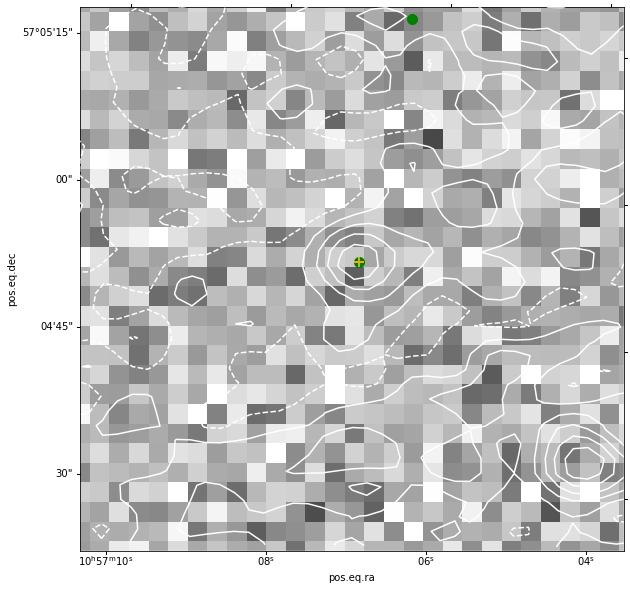

contours are at [-8.27433529e-05 -1.09751128e-05  6.07931274e-05  1.32561368e-04
  2.04329608e-04  2.76097848e-04  3.47866088e-04]
plotting 7 sources
plotting 1 sources
plotting 1 sources


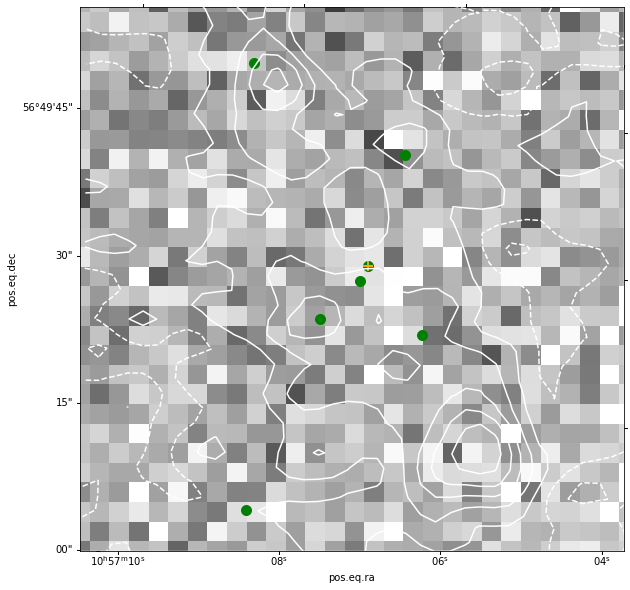

In [141]:
mask = lofar_pacs_table['F_PACS_100']>100
ras = lofar_pacs_table['RA']
decs = lofar_pacs_table['Dec']

#ra = 244.01967769676352
#dec = 55.61836714885293
for n in range(len(lofar_pacs_table['RA'][mask])):
    image_plotting.plot_figure(im100,[pacs_prior,lofar_pacs_table,lofar_orig],w_100,ras[n],decs[n],plot_params,contour_data=[radim_data,radim_wcs])

## Create the individual SPIRE catalogues

In [69]:
lofar = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mask = (~np.isnan(lofar['F_SPIRE_250'])) | (~np.isnan(lofar['F_SPIRE_350'])) | (~np.isnan(lofar['F_SPIRE_500']))
lofar = lofar[~mask]

In [78]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus*.pkl')

name = file_list[0]
taskid = int(name.split('/')[3][12:])
batch_size = 20

ind_low = taskid*batch_size
if taskid*batch_size+batch_size>len(lofar):
    ind_up = len(lofar)
else:
    ind_up = taskid*batch_size+batch_size
ras = lofar['optRA'][ind_low:ind_up]
mask = np.isnan(ras)
ras[mask] = lofar['RA'][ind_low:ind_up][mask]

decs = lofar['optDec'][ind_low:ind_up]
mask = np.isnan(decs)
decs[mask] = lofar['DEC'][ind_low:ind_up][mask]

ids = lofar['Source_Name'][ind_low:ind_up]

name = file_list[0]
taskid = name.split('/')[3][12:]

priors,posterior = xidplus.load(file_list[0])
SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
SPIRE_cat = Table.read(SPIRE_cat)
mask = [SPIRE_cat['HELP_ID'][i] in ids for i in range(len(SPIRE_cat))]
lofar_spire_table = SPIRE_cat[mask]

from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(SPIRE_cat[mask], None):
    registry.write(SPIRE_cat[mask], file_list[0].replace('.pkl','_radio.fits'),format='fits',overwrite=True)

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(len(lofar_spire_table))
        print(i)
    
    #print (filename,filename.split('/')[3][12:])
    taskid = int(filename.split('/')[3][12:])
    batch_size = 20

    ind_low = taskid*batch_size
    if taskid*batch_size+batch_size>len(lofar):
        ind_up = len(lofar)
    else:
        ind_up = taskid*batch_size+batch_size
    ras = lofar['optRA'][ind_low:ind_up]
    mask = np.isnan(ras)
    ras[mask] = lofar['RA'][ind_low:ind_up][mask]

    decs = lofar['optDec'][ind_low:ind_up]
    mask = np.isnan(decs)
    decs[mask] = lofar['DEC'][ind_low:ind_up][mask]

    ids = lofar['Source_Name'][ind_low:ind_up]
    
    priors,posterior = xidplus.load(filename)
    SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
    SPIRE_cat = Table.read(SPIRE_cat,memmap=False)
    mask = [SPIRE_cat['HELP_ID'][i] in ids for i in range(len(SPIRE_cat))]
    
    with serialize_method_as(SPIRE_cat[mask], None):
        registry.write(SPIRE_cat[mask], filename.replace('.pkl','_radio.fits'),format='fits',overwrite=True)
    
    lofar_spire_table = vstack([lofar_spire_table,SPIRE_cat[mask]])
    

data_rerun_table = lofar_spire_table



<class 'astropy.table.table.Table'>
fits
20
0


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
1020
50


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
2020
100


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
3020
150


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
4020
200


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
5020
250


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
6020
300


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits
7020
350


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


<class 'astropy.table.table.Table'>
fits


In [70]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus*.pkl')

name = file_list[0]
taskid = int(name.split('/')[3][12:])
batch_size = 20

ind_low = taskid*batch_size
if taskid*batch_size+batch_size>len(lofar):
    ind_up = len(lofar)
else:
    ind_up = taskid*batch_size+batch_size
ras = lofar['optRA'][ind_low:ind_up]
mask = np.isnan(ras)
ras[mask] = lofar['RA'][ind_low:ind_up][mask]

decs = lofar['optDec'][ind_low:ind_up]
mask = np.isnan(decs)
decs[mask] = lofar['DEC'][ind_low:ind_up][mask]

ids = lofar['Source_Name'][ind_low:ind_up]

name = file_list[0]
taskid = name.split('/')[3][12:]

priors,posterior = xidplus.load(file_list[0])
SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
SPIRE_cat = Table.read(SPIRE_cat)
mask = [SPIRE_cat['HELP_ID'][i] in ids for i in range(len(SPIRE_cat))]
lofar_spire_table = SPIRE_cat[mask]



In [72]:
file_list[0]

'data/fir/SPIRE/xidplus_run_85/lofar_xidplus_fir_85.pkl'

## Processing SPIRE output

In [79]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus_fir_*_radio.fits')

lofar_spire_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_spire_table = vstack([lofar_spire_table,new_table])
data_rerun_table = lofar_spire_table

0
50
100
150
200
250
300
350


In [80]:
lofar_spire_table

<Table length=7900>
       HELP_ID                 RA         ... Pval_res_350 Pval_res_500
                            degrees       ...                          
       bytes27              float64       ...   float32      float32   
---------------------- ------------------ ... ------------ ------------
ILTJ103808.37+580509.9 159.53464054991468 ...        0.663        0.288
ILTJ103808.47+582743.0 159.53551030809962 ...        0.689        0.342
ILTJ103808.48+582518.1 159.53539862663627 ...        0.894        0.807
ILTJ103809.33+585934.9 159.53851514087347 ...         0.28        0.115
ILTJ103809.36+572336.1 159.53907391833312 ...         0.69        0.262
ILTJ103809.54+575840.1  159.5394415284406 ...        0.777        0.331
ILTJ103809.62+575606.2 159.54118638216028 ...         0.99        0.404
ILTJ103809.73+572111.8  159.5399240377052 ...        0.995        0.679
ILTJ103809.87+584614.9 159.54126160415967 ...          0.4        0.293
                   ...                ... ...          ...          ...
ILTJ103752.14+585503.4 159.46778406327732 ...        0.674        0.577
ILTJ103752.15+575048.8 159.46723840693693 ...        0.882        0.558
ILTJ103752.25+571555.5 159.46854370291746 ...        0.953        0.807
ILTJ103752.28+580540.8   159.468430028129 ...         0.59        0.451
ILTJ103752.35+572547.9 159.46851089878263 ...          1.0        0.706
ILTJ103752.50+583514.3 159.46909251174313 ...        0.932        0.332
ILTJ103752.51+585035.7  159.4686017675204 ...        0.948        0.246
ILTJ103752.58+592806.1   159.469198284488 ...         0.97        0.151
ILTJ103752.66+585902.5 159.46955995115937 ...        0.996        0.954
ILTJ103752.74+591908.5 159.46990180853916 ...          1.0          1.0

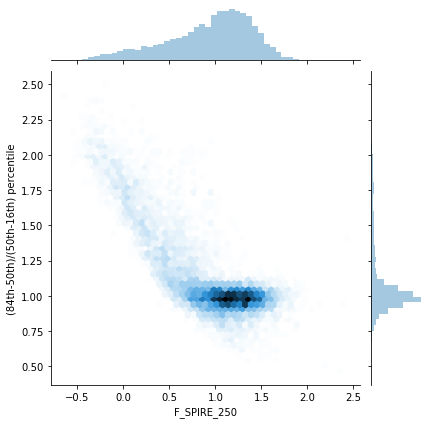

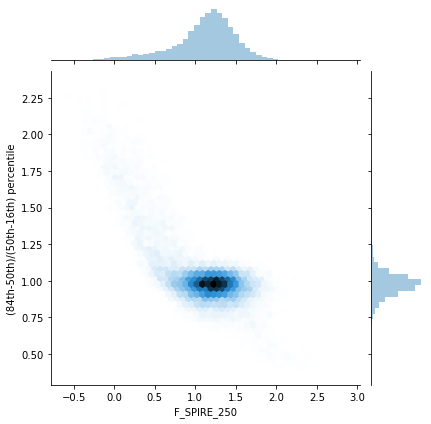

In [81]:
skew=(lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_250']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_250']),y=skew, kind='hex')


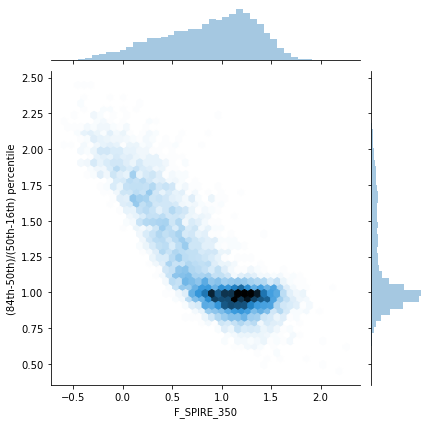

In [82]:
skew=(lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_350']),y=skew, kind='hex')

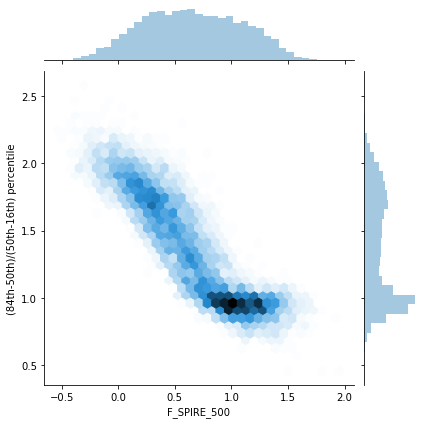

In [83]:
skew=(lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_500']),y=skew, kind='hex')

In [84]:
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_250'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_350'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_500'))

In [85]:
ind_SERVS_250=(lofar_spire_table['Pval_res_250']>0.5) | (lofar_spire_table['F_SPIRE_250'] < 4)
ind_SERVS_350=(lofar_spire_table['Pval_res_350']>0.5) | (lofar_spire_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(lofar_spire_table['Pval_res_500']>0.5) | (lofar_spire_table['F_SPIRE_500'] < 4)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(lofar_spire_table))

lofar_spire_table['flag_spire_250'][ind_SERVS_250]=True
lofar_spire_table['flag_spire_350'][ind_SERVS_350]=True
lofar_spire_table['flag_spire_500'][ind_SERVS_500]=True

2983 4544 4459 7900


In [87]:
np.sum(lofar_spire_table['Pval_res_250']>0.5)

1410

In [88]:
rerun_col = Column(np.ones(len(lofar_spire_table)),name='XID+_rerun_SPIRE',dtype='bool')
lofar_spire_table.add_column(rerun_col)

In [89]:
lofar_spire_table.rename_column('HELP_ID','help_id')

In [90]:
lofar_spire_table[0]

<Row index=0>
       help_id                 RA                Dec        F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500 XID+_rerun_SPIRE
                            degrees            degrees          mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
       bytes27              float64            float64        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- ------------------ ----------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ103808.37+580509.9 159.53464054991468 58.08605343923459    8.590963        10.576816         6.476844    8.975551        11.293974        6.6737905   5.9913845         9.178145         3.202219     -3.149718    -4.1021876    -5.7088976          2.9685857          3.4575033           3.371029     0.99829054      1.0003258      0.9994559          2000.0          2000.0          2000.0        0.097        0.663        0.288          False           True          False             True

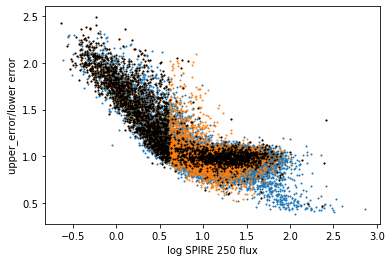

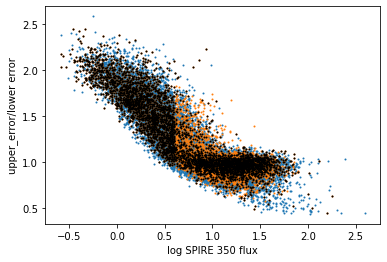

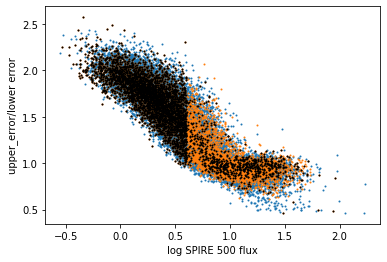

In [91]:
x = np.log10(lofar_orig['F_SPIRE_250'])
y = (lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_250'])
y = (lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log SPIRE 250 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_350'])
y = (lofar_orig['FErr_SPIRE_350_u']-lofar_orig['F_SPIRE_350'])/(lofar_orig['F_SPIRE_350']-lofar_orig['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_350'])
y = (lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_350],y[ind_SERVS_350],s=1,c='black')
plt.xlabel('log SPIRE 350 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_500'])
y = (lofar_orig['FErr_SPIRE_500_u']-lofar_orig['F_SPIRE_500'])/(lofar_orig['F_SPIRE_500']-lofar_orig['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_500'])
y = (lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_500],y[ind_SERVS_500],s=1,c='black')
plt.xlabel('log SPIRE 500 flux')
plt.ylabel('upper_error/lower error')
plt.show()

## Plot SPIRE Sources

In [129]:
imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE250_v1.0.fits'
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE350_v1.0.fits'
hdulist = fits.open(pswfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['image'].header

im350=hdulist['image'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE500_v1.0.fits'
hdulist = fits.open(pswfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['image'].header

im500=hdulist['image'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['image'].header)
hdulist.close()

In [127]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


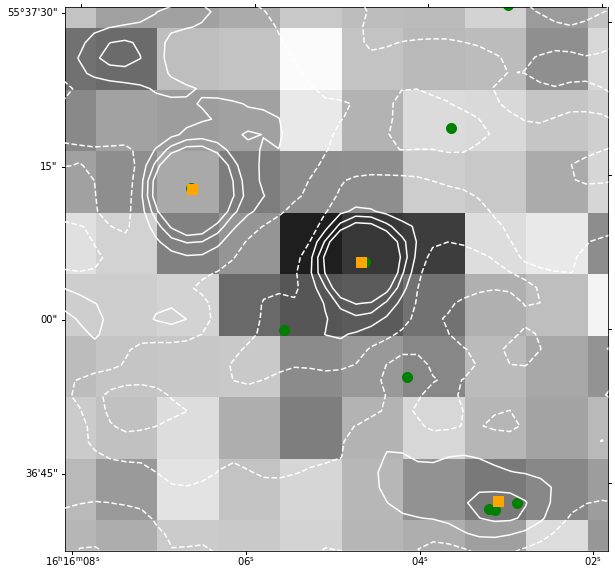

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


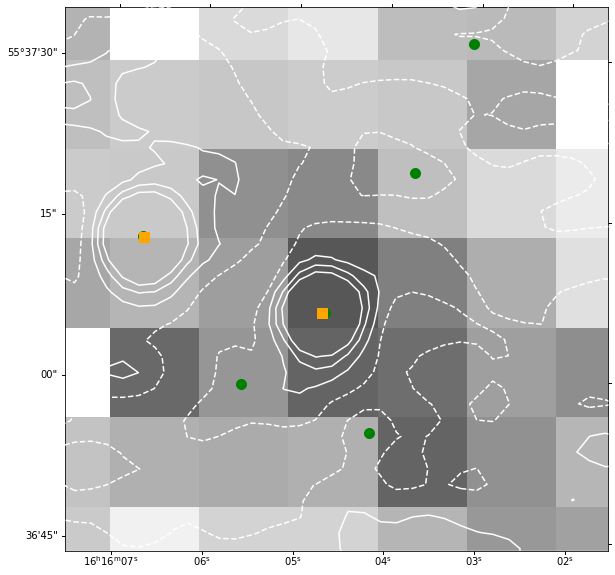

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


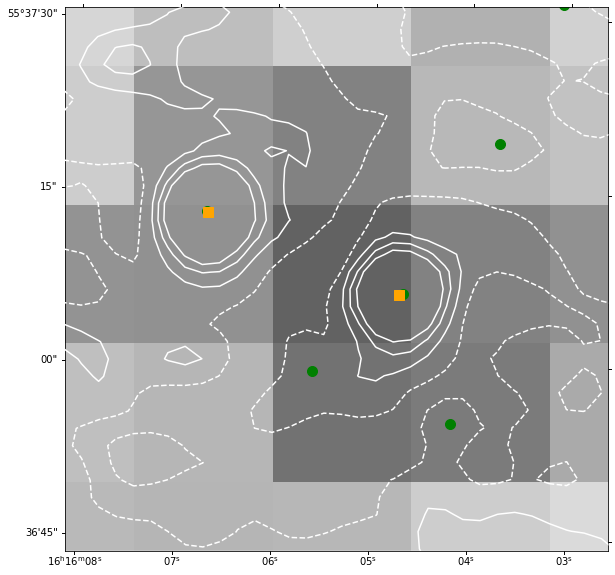

In [130]:
ra = 244.01967769676352
dec = 55.61836714885293
image_plotting.plot_figure(im250,[pacs_prior,lofar_spire_table,lofar_orig],w_250,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im350,[pacs_prior,lofar_spire_table,lofar_orig],w_350,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im500,[pacs_prior,lofar_spire_table,lofar_orig],w_500,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Merge the MIPS, PACS and SPIRE catalogues

In [149]:
MIPS_x_PACS = join(lofar_mips_table,lofar_pacs_table,keys='help_id',join_type='outer')
fir_table = join(MIPS_x_PACS,lofar_spire_table,keys='help_id',join_type='outer')

In [150]:
fir_table.remove_columns(['RA','RA_2','Dec','Dec_2'])        
fir_table.rename_column('help_id','Source_Name')
fir_table.rename_column('RA_1','RA')
fir_table.rename_column('Dec_1','Dec')

In [151]:
fir_table[0]

<Row index=0>
     Source_Name           RA        Dec    F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 XID+_rerun_mips F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_pacs_100 flag_pacs_160 XID+_rerun_pacs F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500 XID+_rerun_SPIRE
                        degrees    degrees     muJy        muJy           muJy        MJy / sr       MJy / sr                                                                            mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam     mJy/Beam        mJy/Beam          mJy/Beam                                                                                                                                         mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
       bytes27          float64    float64   float32     float32        float32       float32        float32        float32       float32      float32       bool           bool       float32       float32         float32      float32       float32         float32       float32      float32         float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- ---------- --------- --------- -------------- -------------- ------------ ---------------- ------------ ------------- ----------- ------------ --------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------ ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- --------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ102955.65+580259.6 157.481696 58.049971 224.61604       537.7366       64.91696 -0.029192757    5.1082097e-06    1.0010947        2000.0         0.0        False            True  11.275938       20.707275       3.8101895  17.116108       30.600212        5.653755     5.834397    2.3695583          7.360767         2.7431986    0.99870497     1.0026941        1790.76      2015.2031        0.997        0.032          True   

In [167]:
fir_table_v01 = fir_table.copy()

In [168]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [169]:
new_fir_table[0]

<Row index=0>
     Source_Name          RA_1      Dec_1   F_MIPS_24_1 FErr_MIPS_24_u_1 FErr_MIPS_24_l_1 Bkg_MIPS_24_1 Sig_conf_MIPS_24_1 Rhat_MIPS_24_1 n_eff_MIPS_24_1 Pval_res_24_1 flag_mips_24_1 XID+_rerun_mips_1 F_PACS_100_1 FErr_PACS_100_u_1 FErr_PACS_100_l_1 F_PACS_160_1 FErr_PACS_160_u_1 FErr_PACS_160_l_1 Bkg_PACS_100_1 Bkg_PACS_160_1 Sig_conf_PACS_100_1 Sig_conf_PACS_160_1 Rhat_PACS_100_1 Rhat_PACS_160_1 n_eff_PACS_100_1 n_eff_PACS_160_1 Pval_res_100_1 Pval_res_160_1 flag_pacs_100_1 flag_pacs_160_1 XID+_rerun_pacs_1 F_SPIRE_250_1 FErr_SPIRE_250_u_1 FErr_SPIRE_250_l_1 F_SPIRE_350_1 FErr_SPIRE_350_u_1 FErr_SPIRE_350_l_1 F_SPIRE_500_1 FErr_SPIRE_500_u_1 FErr_SPIRE_500_l_1 Bkg_SPIRE_250_1 Bkg_SPIRE_350_1 Bkg_SPIRE_500_1 Sig_conf_SPIRE_250_1 Sig_conf_SPIRE_350_1 Sig_conf_SPIRE_500_1 Rhat_SPIRE_250_1 Rhat_SPIRE_350_1 Rhat_SPIRE_500_1 n_eff_SPIRE_250_1 n_eff_SPIRE_500_1 n_eff_SPIRE_350_1 Pval_res_250_1 Pval_res_350_1 Pval_res_500_1 flag_spire_250_1 flag_spire_350_1 flag_spire_500_1 XID+_rerun_SPIRE_1    RA_2      Dec_2   F_MIPS_24_2 FErr_MIPS_24_u_2 FErr_MIPS_24_l_2 Bkg_MIPS_24_2 Sig_conf_MIPS_24_2 Rhat_MIPS_24_2 n_eff_MIPS_24_2 Pval_res_24_2 flag_mips_24_2 XID+_rerun_mips_2 F_PACS_100_2 FErr_PACS_100_u_2 FErr_PACS_100_l_2 F_PACS_160_2 FErr_PACS_160_u_2 FErr_PACS_160_l_2 Bkg_PACS_100_2 Bkg_PACS_160_2 Sig_conf_PACS_100_2 Sig_conf_PACS_160_2 Rhat_PACS_100_2 Rhat_PACS_160_2 n_eff_PACS_100_2 n_eff_PACS_160_2 Pval_res_100_2 Pval_res_160_2 flag_pacs_100_2 flag_pacs_160_2 XID+_rerun_pacs_2 F_SPIRE_250_2 FErr_SPIRE_250_u_2 FErr_SPIRE_250_l_2 F_SPIRE_350_2 FErr_SPIRE_350_u_2 FErr_SPIRE_350_l_2 F_SPIRE_500_2 FErr_SPIRE_500_u_2 FErr_SPIRE_500_l_2 Bkg_SPIRE_250_2 Bkg_SPIRE_350_2 Bkg_SPIRE_500_2 Sig_conf_SPIRE_250_2 Sig_conf_SPIRE_350_2 Sig_conf_SPIRE_500_2 Rhat_SPIRE_250_2 Rhat_SPIRE_350_2 Rhat_SPIRE_500_2 n_eff_SPIRE_250_2 n_eff_SPIRE_500_2 n_eff_SPIRE_350_2 Pval_res_250_2 Pval_res_350_2 Pval_res_500_2 flag_spire_250_2 flag_spire_350_2 flag_spire_500_2 XID+_rerun_SPIRE_2
                        degrees    degrees      muJy          muJy             muJy          MJy / sr        MJy / sr                                                                                        mJy             mJy               mJy            mJy             mJy               mJy           mJy/Beam       mJy/Beam          mJy/Beam            mJy/Beam                                                                                                                                                             mJy             mJy                mJy              mJy             mJy                mJy              mJy             mJy                mJy             mJy/Beam        mJy/Beam        mJy/Beam          mJy/Beam             mJy/Beam             mJy/Beam                                                                                                                                                                                                                                    degrees    degrees      muJy          muJy             muJy          MJy / sr        MJy / sr                                                                                        mJy             mJy               mJy            mJy             mJy               mJy           mJy/Beam       mJy/Beam          mJy/Beam            mJy/Beam                                                                                                                                                             mJy             mJy                mJy              mJy             mJy                mJy              mJy             mJy                mJy             mJy/Beam        mJy/Beam        mJy/Beam          mJy/Beam             mJy/Beam             mJy/Beam                                                                                                                                                                                                                                  
       bytes27          

In [170]:
new_fir_table.remove_columns(['RA_2','Dec_2'])
new_fir_table.rename_column('RA_1','RA')
new_fir_table.rename_column('Dec_1','Dec')

for name in fir_table.colnames:
    print(name)
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue
    if ('250' in name) or ('350' in name) or ('500' in name) or ('SPIRE' in name):
        colname = name+'_1'
        new_fir_table.rename_column(colname,name)
        new_fir_table.remove_column(name+'_2')
        continue
    colname = name+'_1'
    print(colname)
    try:
        mask = new_fir_table[colname].mask
    except:
        mask = np.isnan(new_fir_table[colname])
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

Source_Name
RA
Dec
F_MIPS_24
F_MIPS_24_1
FErr_MIPS_24_u
FErr_MIPS_24_u_1
FErr_MIPS_24_l
FErr_MIPS_24_l_1
Bkg_MIPS_24
Bkg_MIPS_24_1
Sig_conf_MIPS_24
Sig_conf_MIPS_24_1
Rhat_MIPS_24
Rhat_MIPS_24_1
n_eff_MIPS_24
n_eff_MIPS_24_1
Pval_res_24
Pval_res_24_1
flag_mips_24
flag_mips_24_1
XID+_rerun_mips
XID+_rerun_mips_1
F_PACS_100
F_PACS_100_1
FErr_PACS_100_u
FErr_PACS_100_u_1
FErr_PACS_100_l
FErr_PACS_100_l_1
F_PACS_160
F_PACS_160_1
FErr_PACS_160_u
FErr_PACS_160_u_1
FErr_PACS_160_l
FErr_PACS_160_l_1
Bkg_PACS_100
Bkg_PACS_100_1
Bkg_PACS_160
Bkg_PACS_160_1
Sig_conf_PACS_100
Sig_conf_PACS_100_1
Sig_conf_PACS_160
Sig_conf_PACS_160_1
Rhat_PACS_100
Rhat_PACS_100_1
Rhat_PACS_160
Rhat_PACS_160_1
n_eff_PACS_100
n_eff_PACS_100_1
n_eff_PACS_160
n_eff_PACS_160_1
Pval_res_100
Pval_res_100_1
Pval_res_160
Pval_res_160_1
flag_pacs_100
flag_pacs_100_1
flag_pacs_160
flag_pacs_160_1
XID+_rerun_pacs
XID+_rerun_pacs_1
F_SPIRE_250
FErr_SPIRE_250_u
FErr_SPIRE_250_l
F_SPIRE_350
FErr_SPIRE_350_u
FErr_SPIRE_350_l
F_SPI

In [171]:
new_fir_table[0]

<Row index=0>
     Source_Name           RA        Dec    F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 XID+_rerun_mips F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_pacs_100 flag_pacs_160 XID+_rerun_pacs F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500 XID+_rerun_SPIRE
                        degrees    degrees     muJy        muJy           muJy        MJy / sr       MJy / sr                                                                            mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam     mJy/Beam        mJy/Beam          mJy/Beam                                                                                                                                         mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
       bytes27          float64    float64   float32     float32        float32       float32        float32        float32       float32      float32       bool           bool       float32       float32         float32      float32       float32         float32       float32      float32         float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- ---------- --------- --------- -------------- -------------- ------------ ---------------- ------------ ------------- ----------- ------------ --------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------ ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- --------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ102955.65+580259.6 157.481696 58.049971 224.61604       537.7366       64.91696 -0.029192757    5.1082097e-06    1.0010947        2000.0         0.0        False            True  11.275938       20.707275       3.8101895  17.116108       30.600212        5.653755     5.834397    2.3695583          7.360767         2.7431986    0.99870497     1.0026941        1790.76      2015.2031        0.997        0.032          True   

In [172]:
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(new_fir_table, None):
            registry.write(new_fir_table, 'data/data_release/XID+_lofar_Lockman_v0.5_20200303.fits',format='fits',overwrite=True)

<class 'astropy.table.table.Table'>
fits


In [143]:
for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)
fir_table.rename_column('help_id','Source_Name')

RA_1
Dec_1
RA_2
Dec_2
RA
Dec


In [144]:
fir_table[0]

<Row index=0>
     Source_Name       F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 XID+_rerun_mips F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_pacs_100 flag_pacs_160 XID+_rerun_pacs F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500 XID+_rerun_SPIRE
                          muJy        muJy           muJy        MJy / sr       MJy / sr                                                                            mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam     mJy/Beam        mJy/Beam          mJy/Beam                                                                                                                                         mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
       bytes27          float32     float32        float32       float32        float32        float32       float32      float32       bool           bool       float32       float32         float32      float32       float32         float32       float32      float32         float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- --------- -------------- -------------- ------------ ---------------- ------------ ------------- ----------- ------------ --------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------ ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- --------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ102955.65+580259.6 224.61604       537.7366       64.91696 -0.029192757    5.1082097e-06    1.0010947        2000.0         0.0        False            True  11.275938       20.707275       3.8101895  17.116108       30.600212        5.653755     5.834397    2.3695583          7.360767         2.7431986    0.99870497     1.0026941        1790.76      2015.2031        0.997        0.032          True          True            True   6.4310837          11.1851        1.9852812   2.1982007        4.8981586   

In [145]:
fir_table_v01 = fir_table.copy()

In [146]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [147]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [148]:
for name in fir_table.colnames:
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue

    colname = name+'_1'
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

AttributeError: 'Column' object has no attribute 'mask'

In [80]:
new_fir_table.colnames

['Source_Name',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'Bkg_MIPS_24',
 'Sig_conf_MIPS_24',
 'Rhat_MIPS_24',
 'n_eff_MIPS_24',
 'Pval_res_24',
 'flag_MIPS_24',
 'XID+_rerun_mips',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'Bkg_PACS_100',
 'Bkg_PACS_160',
 'Sig_conf_PACS_100',
 'Sig_conf_PACS_160',
 'Rhat_PACS_100',
 'Rhat_PACS_160',
 'n_eff_PACS_100',
 'n_eff_PACS_160',
 'Pval_res_100',
 'Pval_res_160',
 'flag_PACS_100',
 'flag_PACS_160',
 'XID+_rerun_pacs',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_

In [81]:
lofar_fir = join(lofar_orig,new_fir_table,keys='Source_Name',join_type='outer')

In [82]:
lofar_fir[0]

<Row index=0 masked=True>
     Source_Name               RA                DEC                 E_RA                 E_DEC                Total_flux            E_Total_flux            Peak_flux           E_Peak_flux      S_Code         Maj                   Min                  PA                E_Maj                 E_Min                E_PA                DC_Maj                DC_Min              DC_PA               Isl_rms         FLAG_WORKFLOW Prefilter  NoID  lr_fin   optRA      optDec  LGZ_Size LGZ_Width  LGZ_PA Assoc Assoc_Qual Art_prob Blend_prob Hostbroken_prob Imagemissing_prob Zoom_prob        Created           Position_from   Renamed_from FLAG_OVERLAP_RADIO flag_clean_radio    ID   X_IMAGE Y_IMAGE ALPHA_J2000 DELTA_J2000 flag_clean ID_OPTICAL ID_SPITZER FLAG_OVERLAP     EBV        u_flux_corr        u_fluxerr_corr       u_mag_corr     u_magerr_corr    g_flux_corr       g_fluxerr_corr       g_mag_corr    g_magerr_corr      r_flux_corr          r_fluxerr_corr       r_mag_corr    r_magerr_corr z_flux_corr z_fluxerr_corr z_mag_corr z_magerr_corr  g_rcs_flux_corr   g_rcs_fluxerr_corr   g_rcs_mag_corr   g_rcs_magerr_corr  r_rcs_flux_corr   r_rcs_fluxerr_corr   r_rcs_mag_corr   r_rcs_magerr_corr i_rcs_flux_corr  i_rcs_fluxerr_corr   i_rcs_mag_corr  i_rcs_magerr_corr  z_rcs_flux_corr  z_rcs_fluxerr_corr   z_rcs_mag_corr  z_rcs_magerr_corr J_flux_corr J_fluxerr_corr J_mag_corr J_magerr_corr K_flux_corr K_fluxerr_corr K_mag_corr K_magerr_corr ch1_swire_flux_corr ch1_swire_fluxerr_corr ch1_swire_mag_corr ch1_swire_magerr_corr ch2_swire_flux_corr ch2_swire_fluxerr_corr ch2_swire_mag_corr ch2_swire_magerr_corr ch3_swire_flux_corr ch3_swire_fluxerr_corr ch3_swire_mag_corr ch3_swire_magerr_corr ch4_swire_flux_corr ch4_swire_fluxerr_corr ch4_swire_mag_corr ch4_swire_magerr_corr ch1_servs_flux_corr ch1_servs_fluxerr_corr ch1_servs_mag_corr ch1_servs_magerr_corr ch2_servs_flux_corr ch2_servs_fluxerr_corr ch2_servs_mag_corr ch2_servs_magerr_corr Separation help_id RA_HELP DEC_HELP CLASS_STAR F_MIPS_24_1 FErr_MIPS_24_u_1 FErr_MIPS_24_l_1 Bkg_MIPS_24_1 Sig_conf_MIPS_24_1 Rhat_MIPS_24_1 n_eff_MIPS_24_1 Pval_res_24_1 flag_mips_24 F_PACS_100_1 FErr_PACS_100_u_1 FErr_PACS_100_l_1 F_PACS_160_1 FErr_PACS_160_u_1 FErr_PACS_160_l_1 Bkg_PACS_100_1 Bkg_PACS_160_1 Sig_conf_PACS_100_1 Sig_conf_PACS_160_1 Rhat_PACS_100_1 Rhat_PACS_160_1 n_eff_PACS_100_1 n_eff_PACS_160_1 Pval_res_100_1 Pval_res_160_1 flag_PACS_100_1 flag_PACS_160_1 F_SPIRE_250_1 FErr_SPIRE_250_u_1 FErr_SPIRE_250_l_1 F_SPIRE_350_1 FErr_SPIRE_350_u_1 FErr_SPIRE_350_l_1 F_SPIRE_500_1 FErr_SPIRE_500_u_1 FErr_SPIRE_500_l_1 Bkg_SPIRE_250_1 Bkg_SPIRE_350_1 Bkg_SPIRE_500_1 Sig_conf_SPIRE_250_1 Sig_conf_SPIRE_350_1 Sig_conf_SPIRE_500_1 Rhat_SPIRE_250_1 Rhat_SPIRE_350_1 Rhat_SPIRE_500_1 n_eff_SPIRE_250_1 n_eff_SPIRE_500_1 n_eff_SPIRE_350_1 Pval_res_250_1 Pval_res_350_1 Pval_res_500_1 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna chi_r_best chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN hp_idx_11 hp_depth_cluster tot_corr_g tot_corr_err_g tot_corr_r tot_corr_err_r tot_corr_z tot_corr_err_z  zmodel chi_best Mass_median Mass_l68 Mass_u68 SFR_median SFR_l68 SFR_u68 Nfilts  u_rest  g_rest  r_rest  z_rest g_rcs_rest r_rcs_rest i_rcs_rest z_rcs_rest  J_rest  K_rest ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest F_MIPS_24_2 FErr_MIPS_24_u_2 FErr_MIPS_24_l_2 Bkg_MIPS_24_2 Sig_conf_MIPS_24_2 Rhat_MIPS_24_2 n_eff_MIPS_24_2 Pval_res_24_2 flag_MIPS_24 XID+_rerun_mips F_PACS_100_2 FErr_PACS_100_u_2 FErr_PACS_100_l_2 F_PACS_160_2 FErr_PACS_160_u_2 FErr_PACS_160_l_2 Bkg_PACS_100_2 Bkg_PACS_160_2 Sig_conf_PACS_100_2 Sig_conf_PACS_160_2 Rhat_PACS_100_2 Rhat_PACS_160_2 n_eff_PACS_100_2 n_eff_PACS_160_2 Pval_res_100_2 Pval_res_160_2 flag_PACS_100_2 flag_PACS_160_2 XID+_rerun_pacs F_SPIRE_250_2 FErr_SPIRE_250_u_2 FErr_SPIRE_250_l_2

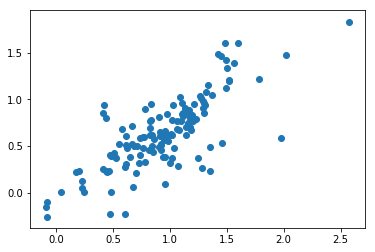

In [98]:
new_mask = ~lofar_fir['F_SPIRE_250_2'].mask
mask = (~np.isnan(lofar_fir['F_SPIRE_250_1'][new_mask])) & (~np.isnan(lofar_fir['F_SPIRE_250_2'][new_mask]))

x = np.log10(lofar_fir['F_SPIRE_250_1'][new_mask][mask])
y = np.log10(lofar_fir['F_SPIRE_250_2'][new_mask][mask])
plt.scatter(x,y)

In [99]:
Table.write(new_fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5.fits')